In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [26]:
data = pd.read_csv("./data/wine_train.csv")
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
1,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
2,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
3,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
102,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510
103,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
104,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   와인_종류                   106 non-null    int64  
 1   알코올_도수                  106 non-null    float64
 2   사과산_함량                  106 non-null    float64
 3   재_함량                    106 non-null    float64
 4   재의_알칼리도                 106 non-null    float64
 5   마그네슘_함량                 106 non-null    int64  
 6   총_페놀_함량                 106 non-null    float64
 7   플라보노이드_함량               106 non-null    float64
 8   비플라보노이드_페놀_함량           106 non-null    float64
 9   프로안토시아닌_함량              106 non-null    float64
 10  색_강도                    106 non-null    float64
 11  색조                      106 non-null    float64
 12  희석_와인의_투과율_OD280_OD315  106 non-null    float64
 13  프롤린_함량                  106 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.

<Axes: >

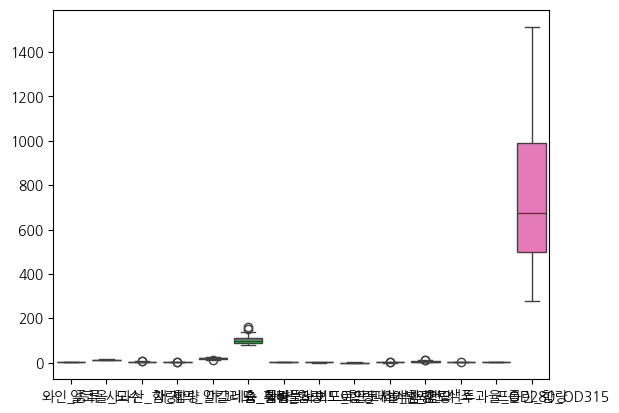

In [28]:
sns.boxplot(data)

<Axes: >

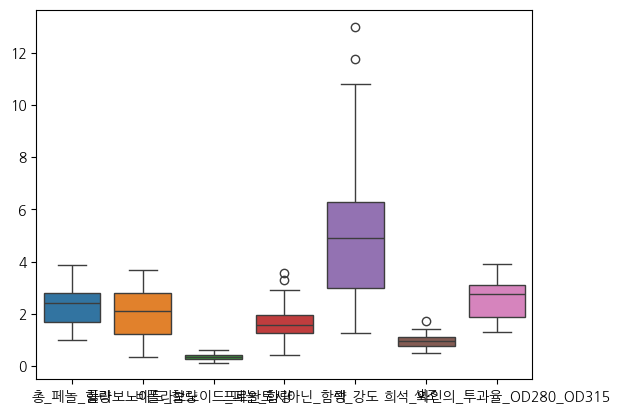

In [29]:
sns.boxplot(data.iloc[:,6:-1])

In [30]:
data.value_counts()

와인_종류  알코올_도수  사과산_함량  재_함량  재의_알칼리도  마그네슘_함량  총_페놀_함량  플라보노이드_함량  비플라보노이드_페놀_함량  프로안토시아닌_함량  색_강도   색조    희석_와인의_투과율_OD280_OD315  프롤린_함량
1      13.05   1.73    2.04  12.4     92       2.72     3.27       0.17           2.91        7.20   1.12  2.91                    1150      1
               1.77    2.10  17.0     107      3.00     3.00       0.28           2.03        5.04   0.88  3.35                    885       1
               2.05    3.22  25.0     124      2.63     2.68       0.47           1.92        3.58   1.13  3.20                    830       1
       13.24   2.59    2.87  21.0     118      2.80     2.69       0.39           1.82        4.32   1.04  2.93                    735       1
       13.28   1.64    2.84  15.5     110      2.60     2.68       0.34           1.36        4.60   1.09  2.78                    880       1
                                                                                                                                            ..
3   

# 테스트 데이터에 트레인 데이터에 해주었던 작업을 동일하게 적용
* MinMaxScaler로 스케일링
* 홀드아웃 - train, valid, test
* mms - MinMaxScaler()
* mms_train = mms.fit_transform(X_train)
* mms_valid = mms.transform(X_valid)
* mms_test = mms.transform(X_test)

In [31]:
X = data.drop('와인_종류', axis=1)
y = data['와인_종류']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler


In [34]:
mms = MinMaxScaler()
X_train_temp = mms.fit_transform(X_train)
X_test_temp = mms.transform(X_test)
mms_X_train = pd.DataFrame(X_train_temp, columns = X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(X_test_temp, columns=X_test.columns, index=X_test.index)

In [35]:
y_train.value_counts()

와인_종류
2    29
1    25
3    20
Name: count, dtype: int64

In [36]:
y_train = pd.get_dummies(y_train)
y_train

,1,2,3
79,False,False,True
54,False,True,False
98,True,False,False
20,False,True,False
92,False,False,True
...,...,...,...
43,True,False,False
16,False,True,False
59,False,False,True
37,False,True,False


In [37]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [40]:
model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,555 (13.89 KB)

 Trainable params: 3,555 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=100)
file_path = "./model/wine_best_model.keras"
model_save = ModelCheckpoint(filepath=file_path, save_best_only=True)
history = model.fit(mms_X_train,
                   epochs=1000,
                   batch_size=16,
                   validation_data=(mms_X_test, y_test),
                   callbacks=[early_stop, model_save])

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'test'])
plt.show()

Epoch 1/1000


ValueError: None values not supported.

#